# CS 6320 Project 2: Detecting Lines and Circles using Hough Transform

A notebook contains many blocks of code, each of which can be run independently. You can run a cell with ctrl+enter or shift+enter (to move to the next cell).


You are expected to complete this notebook with lines of code, plots and texts. You will need to create new cells with original code or text for your analyses and explanations. Explain what you do and analyze your results. This assignment has a total of 100 points.

## Brief
    Hand-in: through Gradescope
    Required files: <your_uid>.zip.(Please begin with 'u' for your uid)
<!---<your_uid>_proj1.pdf--> 


## Setup

   0. Unzip proj2_6320.zip and go to proj2_6320 directory.
      - You can run `unzip proj2_6320.zip && cd proj2_6320` in your terminal.
   1. Install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). It doesn’t matter whether you use Python 2 or 3 because we will create our own environment that uses 3 anyways.
   2. Create a conda environment using the appropriate command. On Windows, open the installed “Conda prompt” to run the command. On MacOS and Linux, you can just use a terminal window to run the command, Modify the command based on your OS (linux, mac, or win): `conda env create -f proj2_env_<OS>.yml`.
    - NOTE that proj2_env.yml is inside the project folder.
   3. This should create an environment named ‘proj2’. Activate it using the Windows command, activate proj2 or the MacOS / Linux command, source activate proj2
   4. Run the notebook using `jupyter notebook` under *proj2_6320* directory.
   5. Ensure that all sanity checks are passing by running pytest tests inside the repo folder.
   6. Generate the zip folder for the code portion of your submission once you’ve finished the project using 
    
        `python zip_submission.py --uid <your_uid>` 


## Library Functions
Do not use any library functions that implement Hough Transform in your solution. You can use functions to perform fitlering etc.

## Debugging
We have included several synthetic images of lines and circles to help test your methods in simpler domains if you'd like.

## Writeup
For this project, this notebook itself is the report. You must run all your cells before you hand in it. You code, results, visualization, and discussion will be used for the grading. You will be deducted points if the results are not shown in this notebook. Do not change the order of the cells. You can add cells in need. You can copy a cell and run it seperately if you need to run a cell multiple times and thus every result is displayed in the cell.


## Rubric
    +26 pts: Ques_1
    +12 pts: Ques_2
    +15 pts: Ques_3
    +17 pts: Ques_4
    +15 pts: Ques_5
    +15 pts: Ques_6

    Distribution of the points in a Question is separately mentioned for each sub-task

    -5*n pts: Lose 5 points for every time you do not follow the instructions for the hand-in format.
    
Submission Format

This is very important as you will lose 5 points for every time you do not follow the instructions. You will attach two items in your submission on Canvas:

1. <your_uid>.zip containing:
    - proj2_code/ - directory containing all your code for this assignment
    - data/       - directory containing all the input images
    - results/    - directory containing all your output images

Do not install any additional packages inside the conda environment. The TAs will use the same environment as defined in the config files we provide you, so anything that’s not in there by default will probably cause your code to break during grading. Do not use absolute paths in your code or your code will break. Use relative paths like the starter code already does. Failure to follow any of these instructions will lead to point deductions. Create the zip file using python zip_submission.py --uid <your_uid> (it will zip up the appropriate directories/files for you!)

In [1]:
import numpy as np
import cv2 as cv
import matplotlib
import matplotlib.pyplot as plt
import math

### 1 Processing an image to detect lines using Hough Transform (26 points)

In this question, we process an image and apply Hough Transform on the processed image

#### Tasks:
1. Compute a smooth version of the Input Image <b>(4 points)</b>
2. Detect edges from Images <b>(6 points)</b>
3. Implement Hough Transform <b>(8 points)</b>
4. Apply Hough Transform to detect lines from images <b>(4 points)</b>
5. Apply Hough Transform to detect edges from images <b>(4 points)</b>

#### 1.1 Compute a smooth version of the Input Image

##### You should use a Gaussian filter to generate a smooth image 

##### Please note:
The function takes in as input only the sigma value (integer only).<br>
The size of the filter should be computed using the sigma value

In [2]:
def Gaussian_Filter(sigma):
    '''
    The function takes in as input only the sigma
    and generates a filter using the sigma value
    The size of the filter should be computed using the sigma value
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    # the size must be the integer
    filter_size = 2 * int(3 * sigma) + 1

    gaussian_filter = np.zeros((filter_size, filter_size))
    
    center = filter_size // 2
    
    for i in range(filter_size):
        for j in range(filter_size):
            x = i - center
            y = j - center
            gaussian_filter[i, j] = (1 / (2 * np.pi * sigma**2)) * np.exp(-(x**2 + y**2) / (2 * sigma**2))
    
    # Normalize the filter
    #gaussian_filter = gaussian_filter / gaussian_filter.sum()
    
    return gaussian_filter
    ################################
    # Your Implementation ENDS here
    ################################

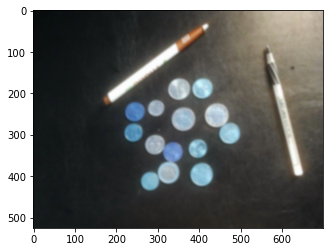

In [3]:
# Reading the Input Image
img        = cv.imread('../data/proj2-clean-image.jpg')

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
smooth_img = cv.filter2D(img, -1, g_kernel)

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_1/proj2-clean-image-smoothed.png", smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(smooth_img.astype(np.uint8));

In [4]:
def rgb2gray(rgb):
    '''
    Converts the RGB image to the Gray Scale
    '''

    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114])

In [5]:
def image_uint(input_arr):
    '''
    Scales the image intensity values to the range [0, 255]
    '''

    return (255.0*(input_arr - np.min(input_arr))/(np.max(input_arr) - np.min(input_arr))).astype(np.uint8)

#### 1.2 Edge Detector
Now we need to extract the edges from the input images. This is as essential step towards detection of lines and circles from the image.

#### You should define a Sobel filter to detect edges in the Original and Smooth Image
Following the definition of the filter, you convolve the filter over the input image using OpenCV library function, <b>filter2D()</b>. You are not required to write any convolution function to apply the filter.

You are required to detect edges on both the <b>original</b> and <b>smooth</b> images.

<b>Do you observe any difference between them? Please comment in a separate cell.</b>

In a smoothed image, the edges may be wider and more blurred. In the original image, the edges may be sharper and more subtle.

The smoothing operation may result in the loss of some subtle features and edges in the image.

Edges may be stronger in the original image and weaker in the smoothed image.

#### 1.2.1 Edge Detector on the Original Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>img_gray_edge</b>.

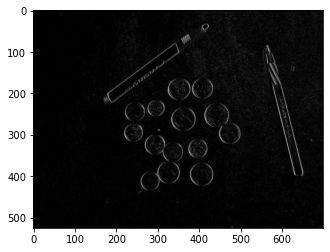

In [6]:
##############################
# TO DO: Your Implementation
##############################
def sobel_filter(image):
    img_gray = rgb2gray(image)
    
    filter_horizontal_x = np.array([
                                    [-1, 0, 1],
                                    [-2, 0, 2],
                                    [-1, 0, 1]
                                                ])
    
    filter_vertical_y = np.array([
                                    [-1, -2, -1],
                                   [0, 0, 0],
                                   [1, 2, 1]
                                                ])
    
    gradient_x = cv.filter2D(img_gray, -1, filter_horizontal_x)
    gradient_y = cv.filter2D(img_gray, -1, filter_vertical_y)
    
    gradient_magnitude = np.sqrt(gradient_x**2, gradient_y**2)
    gradient_magnitude = image_uint(gradient_magnitude)
    
    return gradient_magnitude

img_gray_edge = sobel_filter(img)
################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Ori_Clean_Edge_Image.png', img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.2.2 Edge Detector on the Smooth Image
Please remember the edge detection method should be applied on <b>gray images</b>.
The edge image should be saved as <b>smooth_img_gray_edge</b>.

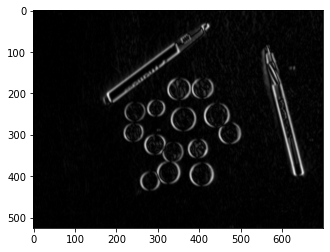

In [7]:
##############################
# TO DO: Your Implementation
##############################
smooth_img_gray_edge = sobel_filter(smooth_img)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Edge_Image.png', smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 1.3 Hough Transform to detect Lines
In this exercise you are expected to implement Hough Transform for line detection as discussed in class. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.<br>

For this exercise, the range of theta is <b>[-90, 90]</b> and the range of rho is <b>[-img_diag, img_diag]</b>.

In [8]:
def hough_transform(input_img, threshold, theta_res, rho_res):

    '''
    This function computes the Accumulator array
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Resolution for Angle
    4. Resolution for Perpendicular Distance from the Origin (Rho)
    
    Output:
    1. Accumulator array       , declare as accumulator
    2. Array of Theta          , declare as thetas
    3. Array of Rho            , declare as rhos
    4. Thresholded Binary Image, declare as binary_img

    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    binary_img = np.where(input_img > threshold, 255, 0)
    height, width = input_img.shape
    
    diag = np.sqrt(height**2 + width**2)
    
    thetas = np.deg2rad(np.arange(-90, 90, theta_res))
    rhos = np.arange(-diag, diag, rho_res)
    
    accumulator = np.zeros((len(rhos), len(thetas)))
    
    # Since the iterations start from row, then column
    y_idx, x_idx = np.nonzero(binary_img)
    
    for (y,x) in zip(y_idx, x_idx):
        for theta_idx, theta in enumerate(thetas):
            
            rho = x * np.cos(theta) + y * np.sin(theta)
            rho_idx = np.argmin(np.abs(rhos - rho))
            accumulator[rho_idx, theta_idx] += 1
            
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, thetas, rhos, binary_img

#### 1.3.1 Hough Transform to detect Lines from Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

<b>Answer: A low threshold value may result in a greater number of edge pixels, including those associated with noise and weaker edges. A high threshold may lead to the loss of information, as only the strongest edges in the image are detected and weaker or partially visible lines may be missed.<b>

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Ori_Clean_Image_Accumulator_Array.png</b> in results/Ques_1 sub-directory.


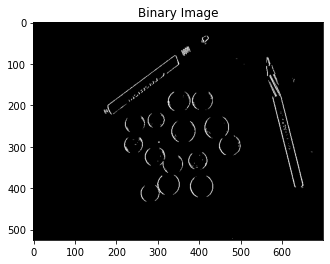

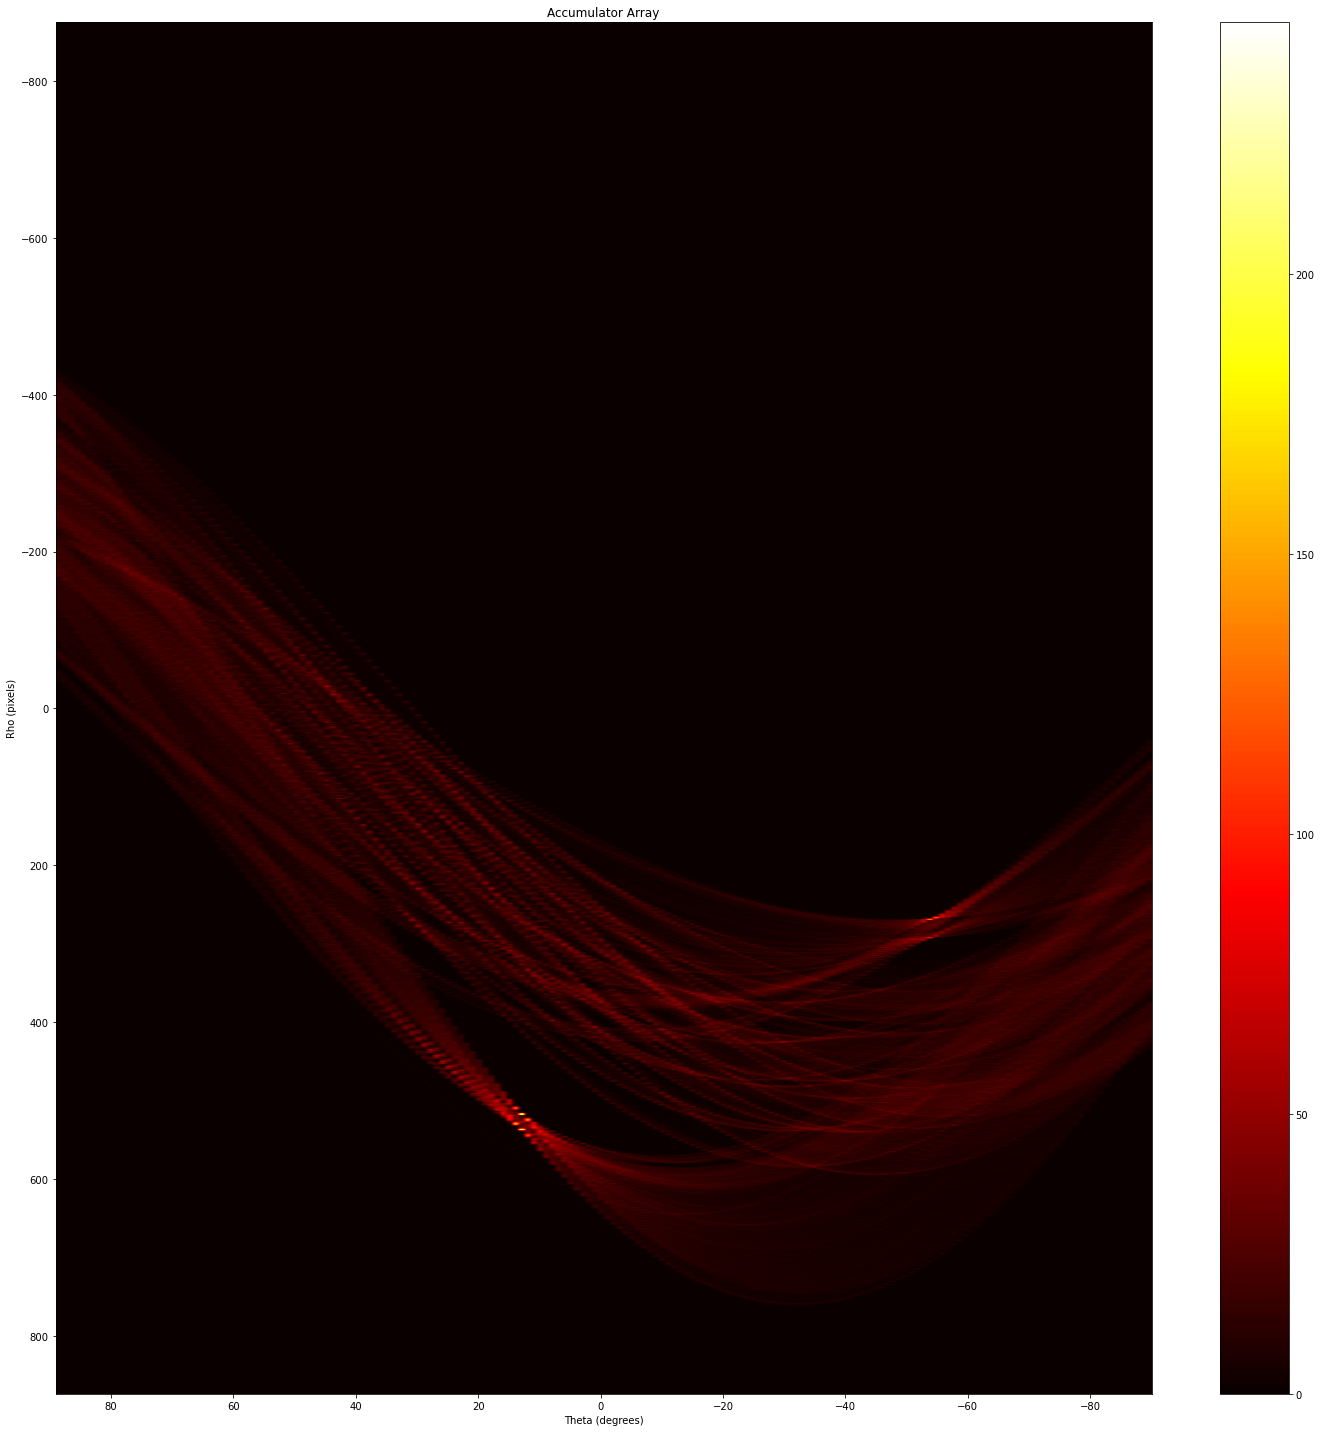

In [9]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

ori_accumulator, ori_thetas, ori_rhos, ori_binary_img = hough_transform(img_gray_edge, threshold=75, theta_res=1, rho_res=1)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Ori_Clean_Binary_Image.png', ori_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(ori_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

# Plot Accumulator Array
##############################
# TO DO: Your Implementation
##############################


# Plot Accumulator Array
plt.figure(figsize=(20, 20))
plt.imshow(ori_accumulator, cmap='hot', aspect='auto',
           extent=[np.rad2deg(ori_thetas[-1]), np.rad2deg(ori_thetas[0]), ori_rhos[-1], ori_rhos[0]])
plt.colorbar()
plt.title('Accumulator Array')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (pixels)')

# Save the figure
plt.tight_layout()
plt.savefig('../results/Ques_1/Ori_Clean_Image_Accumulator_Array.png')
plt.show()

################################
# Your Implementation ENDS here
################################

For plotting lines (infinite) in the images, you should use the OpenCV <b>line</b> function which can hold all the lines and then you could overlay them on the input image.

In [10]:
def plot_lines(img_path, accumulator, thetas, rhos, acc_threshold, save_path):

    '''
    This function plots infinite lines
    This should be used to draw lines along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing
    Saves the output image in save_path
    '''

    ##############################
    # TO DO: Your Implementation
    ##############################
    
    img = cv.imread(img_path)
    img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    height, width = img.shape[0], img.shape[1]
    
    for y in range(accumulator.shape[0]):
        for x in range(accumulator.shape[1]):
            if accumulator[y,x] > acc_threshold:
                rho = rhos[y]
                theta = thetas[x]
                
                if np.abs(np.sin(theta)) > 1e-6: 
                    x1 = 0
                    y1 = int((rho - x1 * np.cos(theta)) / np.sin(theta))
                    x2 = width
                    y2 = int((rho - x2 * np.cos(theta)) / np.sin(theta))
                else:
                    y1 = 0
                    x1 = int(rho / np.cos(theta))
                    y2 = height
                    x2 = int(rho / np.cos(theta))
    
                cv.line(img_rgb, (x1,y1), (x2,y2), (255, 0, 0))
        
    plt.imshow(img_rgb)
    plt.title('Detected Edges')
    plt.axis('off')
    plt.show()
    
    ################################
    # Your Implementation ENDS here
    ################################

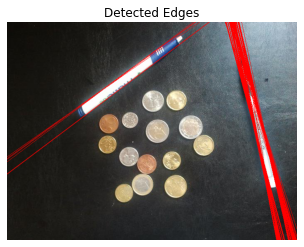

In [11]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, acc_threshold=70, save_path='../results/Ques_1/Ori_Clean_Image_Output_Lines.png')

#### 1.3.2 Hough Transform to detect Lines from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function.<br>
<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract lines. Please discuss the effect of the threshold on the performance of the algorithm.

<b>Answer：If the threshold is set too low, even lower gradient values are considered edges. The result is that non-existent lines may be detected or a line may be detected as multiple lines. If the threshold is set too high, only edges with very high gradients will be detected. Weaker or thinner lines may not be detected.<b>

Plot the Accumulator Array using the matplotlib function, figure size (20, 20), with proper labeling and title. The image should be saved as <b>Smooth_Clean_Image_Accumulator_Array.png</b> in results directory.

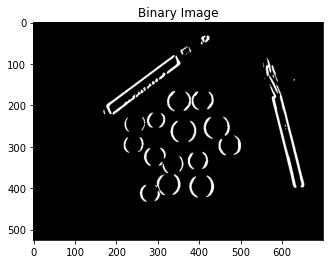

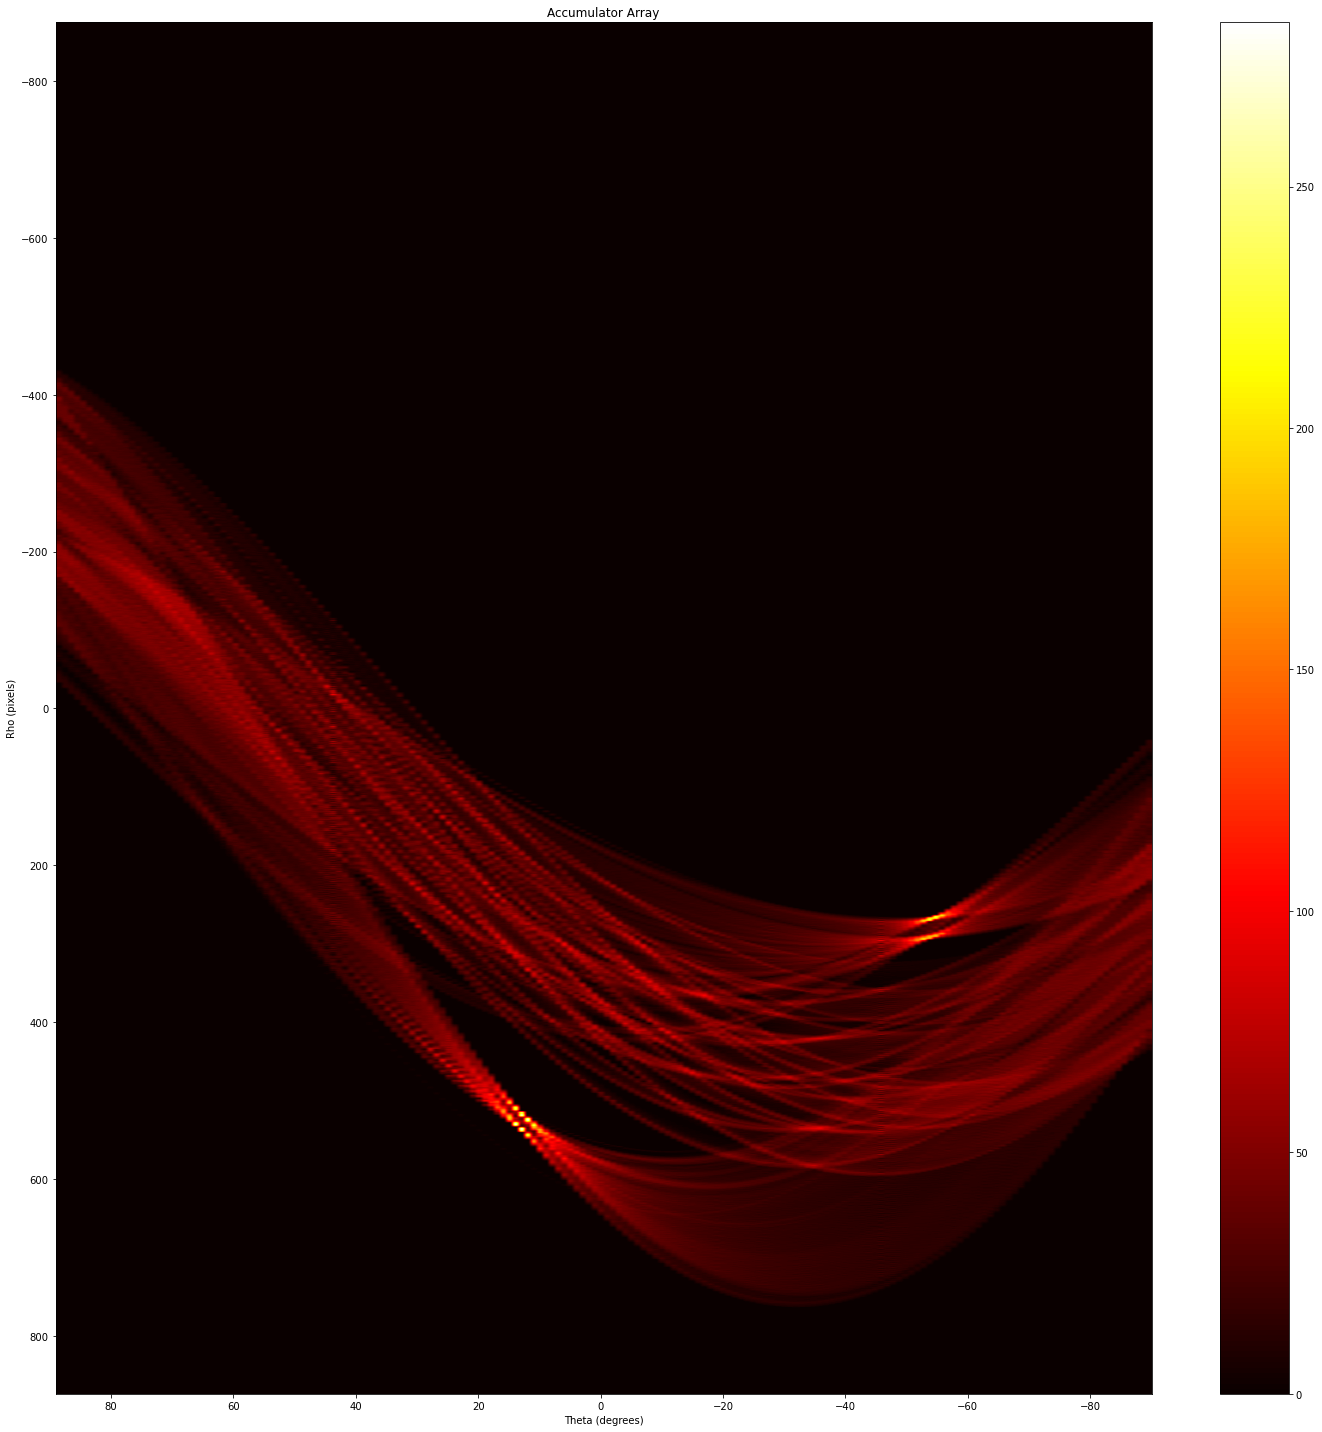

In [46]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

smooth_accumulator, smooth_thetas, smooth_rhos, smooth_binary_img = hough_transform(smooth_img_gray_edge, 75, 1, 1)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_1/Smooth_Clean_Binary_Image.png', smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

##############################
# TO DO: Your Implementation
##############################

# Plot Accumulator Array
plt.figure(figsize=(20, 20))
plt.imshow(smooth_accumulator, cmap='hot', aspect='auto',
           extent=[np.rad2deg(smooth_thetas[-1]), np.rad2deg(smooth_thetas[0]), smooth_rhos[-1], smooth_rhos[0]])
plt.colorbar()
plt.title('Accumulator Array')
plt.xlabel('Theta (degrees)')
plt.ylabel('Rho (pixels)')

# Save the figure
plt.tight_layout()
plt.savefig('../results/Ques_1/Smooth_Clean_Image_Accumulator_Array.png')
plt.show()

################################
# Your Implementation ENDS here
################################

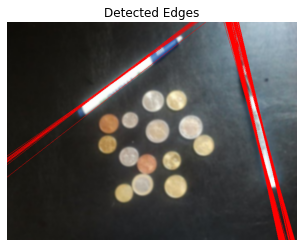

In [13]:
# Plot the Lines extracted on the Smooth Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, acc_threshold=190, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Lines.png')

#### 1.4 Hough Transform to detect Edges

Plot the Edges instead of Lines (infinite) along the boundary of the pens.

you should use the OpenCV <b>line</b> function which can hold all the edges and you could then overlay them on the input image.

In [14]:
def plot_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image, save_path):

    '''
    This function plots edges
    This should be used to draw edges along the boundary of the pens
    
    Input:
    1. RGB Image for plotting lines
    2. Accumulator array
    3. Vector of the angle values
    4. Vector of the rho values
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    '''
    ##############################
    # TO DO: Your Implementation
    ##############################
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    height, width = img.shape[0], img.shape[1]
    
    acc_thresholded = np.where(accumulator > acc_threshold)
    
    for rho_idx, theta_idx in zip(*acc_thresholded):
        rho = rhos[rho_idx]
        theta = thetas[theta_idx]
        
        if np.abs(np.sin(theta)) > 1e-6: 
            x1 = 0
            y1 = int((rho - x1 * np.cos(theta)) / np.sin(theta))
            x2 = width
            y2 = int((rho - x2 * np.cos(theta)) / np.sin(theta))
        else:
            y1 = 0
            x1 = int(rho / np.cos(theta))
            y2 = height
            x2 = int(rho / np.cos(theta))
            
        # Define the line as a function
        def line(x):
            if np.abs(np.sin(theta)) > 1e-6:
                return int((rho - x * np.cos(theta)) / np.sin(theta))
            else:
                return y1  # or y2, since for vertical line they should be the same

        # Find the start and end points of the line segment on the pencil boundary
        start_point = None
        end_point = None
        for x in range(width):
            y = line(x)
            if 0 <= y < height:
                if binary_image[y, x] == 255:  # assuming the pencil boundary is white in the binary image
                    if start_point is None:
                        start_point = (x, y)
                    end_point = (x, y)
        
        # Draw the finite line segment on the image
        if start_point is not None and end_point is not None:
            cv.line(img, start_point, end_point, (0, 255, 0), 2)
            
    plt.imshow(img)
    plt.title('Detected Edges')
    plt.axis('off')
    plt.show()
    
    plt.imsave(save_path, img)
    ################################
    # Your Implementation ENDS here
    ################################

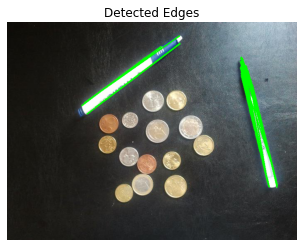

In [15]:
# Plot the Boundaries of the Pen on the Real Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_edges('../data/proj2-clean-image.jpg', ori_accumulator, ori_thetas, ori_rhos, 70, ori_binary_img, save_path='../results/Ques_1/Ori_Clean_Image_Output_Edges.png')

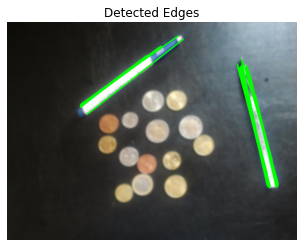

In [16]:
# Plot the Boundaries of the Pen on the Smooth Image
# This unlike the previous result is restricted to a finite length line
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_edges('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_accumulator, smooth_thetas, smooth_rhos, 190, smooth_binary_img, save_path='../results/Ques_1/Smooth_Clean_Image_Output_Edges.png')

### 2. Hough Transform to detect Circles (12 points)
In this exercise you are expected to implement Hough Transform for circle detection in images as discussed in class. Hough Transform uses an accumulator array to capture the circles present in image. As a circle could be defined with three parametrs, center (along X and Y axis) and radius, we need a three-dimensional accumulator to store the circle information.

#### Tasks:
1. Hough Transform to detect circles from the Images <b>(8 points)</b>
2. Plot the detected circles on the corresponding images <b>(4 points)</b>

You need to perform the task on the <b>Original Image</b> and <b>Smooth Image</b> computed earlier.

It is applied on <b>binary images</b> which can be generated by thresholding the edge detector output.<br>
You should use the result of the previous edge detection task as input for this exercise.

<b>The center of the circle should be computed using the parametric equations.</b>

In [17]:
def circle_hough_transform(input_img, threshold, min_radius, max_radius, radius_res, angle_res):

    '''
    This function computes the accumulator array with the circles
    detected in the image
    
    Input:
    1. Output of the Edge Detection Method
    2. Threshold value for generating the binary image
    3. Min Radius of the Circle to be detected
    4. Max Radius of the Circle to be detected
    5. Resolution for Circle Radius
    6. Angle resolution for parametric equation of circle
    
    Output:
    1. Accumulator array          , declare as accumulator
    2. Array for Circle Center    , declare as center_x_vector, center_y_vector
    3. Array for Radius of Circle , declare as radius_vector
    4. Thresholded Binary Image   , declare as binary_img

    '''

    ############################
    # To DO: Your Implementation
    ############################
    binary_img = np.where(input_img > threshold, 255, 0)
    height, width = input_img.shape
    
    angles = np.arange(0, 2*np.pi, angle_res)
    radius_range = np.arange(min_radius, max_radius, radius_res)
    
    # Since center can be anywhere in an image, we use height and width
    accumulator = np.zeros((height, width, len(radius_range)))
    
    y_idx, x_idx = np.nonzero(binary_img)
    
    for (x, y) in zip(x_idx, y_idx):
        for r_idx, r in enumerate(radius_range):
            # Calculate potential circle centers using parametric equations
            a = (x - r * np.cos(angles)).astype(int)
            b = (y - r * np.sin(angles)).astype(int)
            
            # Filter out of bound indices
            mask_a = np.where((a >= 0) & (a < width))
            mask_b = np.where((b >= 0) & (b < height))
            valid_ab = np.intersect1d(mask_a, mask_b)
            
            a_valid = a[valid_ab]
            b_valid = b[valid_ab]
            
            # Update accumulator
            accumulator[b_valid, a_valid, r_idx] += 1
    

    thresh_val = 0.8 * np.max(accumulator) 

    b_coords, a_coords, r_coords = np.where(accumulator > thresh_val)

    center_x_vector = a_coords
    center_y_vector = b_coords
    radius_vector = radius_range[r_coords]
    
    ################################
    # Your Implementation ENDS here
    ################################

    return accumulator, radius_vector, center_x_vector, center_y_vector, binary_img

#### 2.1.1 Hough Transform to detect Circles from the Original Image

Use the edges detected from the <b>original input image</b> to apply Hough Transform function.<br>

You need to find a resaonable estimate of the threshold for generating the binary image which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.

<b>Answer: A threshold that is too low may result in excessive noise and false detections, while a threshold that is too high may result in loss of important edge information and incomplete circular detection. It makes it difficult to detect complete circles by Hough transform.<b>

##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [18]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, ori_circle_img_bin = circle_hough_transform(img_gray_edge, threshold=128, min_radius=15, max_radius=40, radius_res=1, angle_res=3)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Ori_Clean_Binary_Image_Circle_Detection.png', ori_circle_img_bin)

True

Text(0.5, 1.0, 'Binary Image')

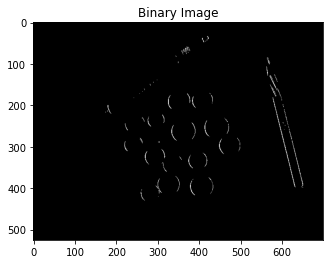

In [19]:
plt.figure(); plt.imshow(ori_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

#### 2.1.2 Hough Transform to detect Circles from the Smooth Image

Use the edges detected from the <b>smooth input image</b> to apply Hough Transform function or generate a suitable smooth image (following the same procedure) for this exercise to detect coins. If you generate a new smooth image please save the generated image as <b>proj2-clean-image-smoothed-circle-detection.png</b>.<br>

You should explain the reason for generating a new smooth image, report the value of sigma and discuss its effect on the performance of the circle detection algorithm.<br>

<b>Answer: The original image may contain noise or other irregular edges, and these may interfere with the process of circle detection. By applying a smoothing filter, this noise can be reduced and the edges can be made sharper. A low Sigma value will result in a smaller smoothing effect. This may not be enough to remove noise from the image, causing the Hough Transform to detect many irrelevant circles. High Sigma values result in a stronger smoothing effect, which may blur out the true circular edges in the image, making them difficult to detect.<b>
    
<br>
You need to find a resaonable estimate of the threshold for generating the binary image
which is good enough for the Hough transform to extract circles. Please discuss the effect of the threshold on the performance of the algorithm.<br>

<b>Answer: When the threshold is set low, darker pixels are also treated as edge pixels. This may result in the results of edge detection containing a lot of noise and pixels in non-edge regions. Higher thresholds may result in only the brightest edges in the image being detected, while other darker edges are ignored. If the edges of a circle are not fully detected, the Hough transform may have difficulty recognizing the circle, resulting in missed detection.<b>
    
##### Please note that you should be able to extract atleast 7 coins. This ensures 75% of the credit.

In [20]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, smooth_circle_img_bin = circle_hough_transform(smooth_img_gray_edge, threshold=100, min_radius=18, max_radius=40, radius_res=1, angle_res=0.25)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_2/Smooth_Clean_Binary_Image_Circle_Detection.png', smooth_circle_img_bin)

True

Text(0.5, 1.0, 'Binary Image')

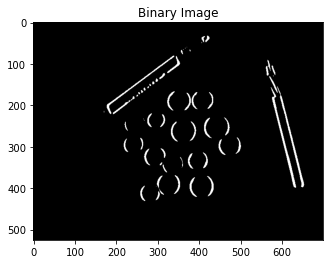

In [21]:
plt.figure(); plt.imshow(smooth_circle_img_bin.astype(np.uint8), cmap='gray'); plt.title('Binary Image') 

#### 2.2 Plot the Circles around the coins in the image
You should use the OpenCV <b>circle</b> function for drawing circles. This can hold all the circles and then you could overlay them on the input image.

In [22]:
def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path):

    '''
    This function plots circles. This should be used to draw lines along the boundary of the pens.
    
    Input:
    1. RGB Image for plotting circles
    2. Accumulator array
    3. Vector of the radius values
    4. Vector of the center of the circle
    5. Threshold value for selecting lines from the accumulator
    6. Path to save the image with lines drawn on them
    
    Output:
    Returns Nothing. Saves the output image in save_path.
    '''
    ##############################
    # TO DO: Your Implementation
    ##############################
    cv_img = cv.imread(img_path)
    
    for center_x, center_y, radius in zip(center_x_vector, center_y_vector, radius_vector):
        # if accumulator[center_y, center_x, radius - min(radius_vector)] > acc_threshold:
        center = (center_x, center_y)
        cv.circle(cv_img, center, radius, (0, 255, 0), 2)
        cv.circle(cv_img, center, 2, (0, 0, 255), 2)

    plt.figure(figsize=(10, 10))
    
    # Convert BGR to RGB for plotting
    plt.imshow(cv.cvtColor(cv_img, cv.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis('off')
    plt.show()
        
    ################################
    # Your Implementation ENDS here
    ################################
    
    # Save the updated image
    cv.imwrite(img_save_path, cv_img)

#### 2.2.1 Plot the Circles around the coins in the Original Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


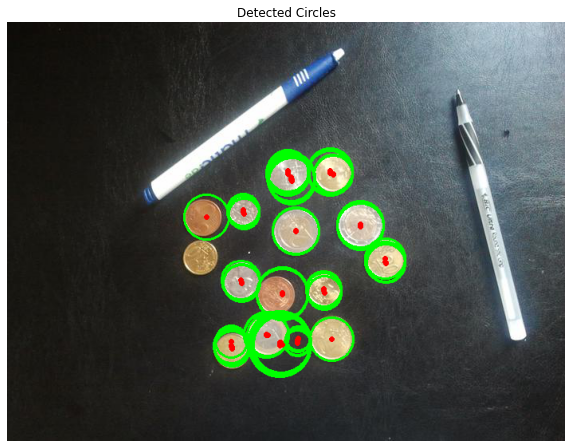

In [23]:
# Plot the Circles extracted on the Original Image

plot_circles('../data/proj2-clean-image.jpg', ori_circle_accumulator, ori_circle_radius_vector, ori_circle_center_x_vector, ori_circle_center_y_vector, 100, ori_circle_img_bin, '../results/Ques_2/Ori_Clean_Image_Output_Circles.png')

#### 2.2.2 Plot the Circles around the coins in the Smooth Image

Play with the Accumulator Thresholding to get rid of unwanted circles.


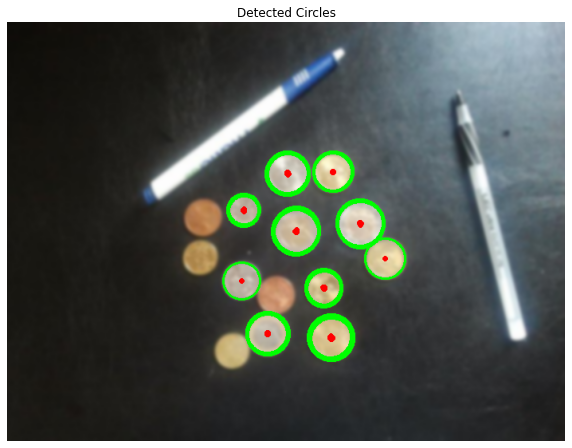

In [24]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_1/proj2-clean-image-smoothed.png', smooth_circle_accumulator, smooth_circle_radius_vector, smooth_circle_center_x_vector, smooth_circle_center_y_vector, 150, smooth_circle_img_bin, '../results/Ques_2/Smooth_Clean_Image_Output_Circles.png')

### 3 Hough Transform to detect Lines from Cluttered Image (15 points)
In this exercise you are expected to implement Hough Transform for line detection from cluttered image. Hough Transform uses an accumulator array to capture the lines present in image. It is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as <b>clutter_smooth_img</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge</b>. <b>(2 points)</b>
3. Identify the lines in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected lines. <b>(2 points)</b>
5. Likely the last produced several lines which DO NOT repesent the boundary of the pens. How do you take care of the probem? <b>(2 points)</b>
6. Find the lines which represents only the boundary of the pens. <b>(5 points)</b>

#### 3.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the lines. Save the smooth image as clutter_smooth_img, numpy array.

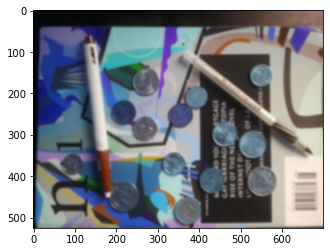

In [25]:
# Reading the Input Image
clutter_img        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img = cv.filter2D(clutter_img, -1, g_kernel)

################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_3/clutter_smooth_img.png", clutter_smooth_img)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img.astype(np.uint8));

#### 3.2 Identify the edges in the smooth image, generated in the previous step. You can use the solution of Ques 1.2. Save the numpy array as clutter_smooth_img_gray_edge.

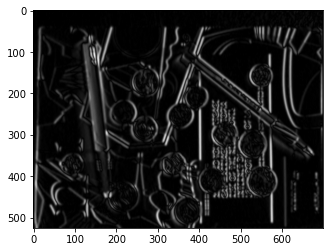

In [26]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_gray_edge = sobel_filter(clutter_smooth_img)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_3/clutter_smooth_img_gray_edge.png', clutter_smooth_img_gray_edge)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 3.3 Identify the lines in the Image using Hough Transform

Text(0.5, 1.0, 'Binary Image')

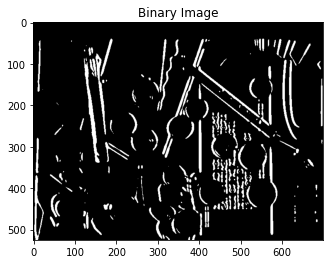

In [27]:
# Invoke the Hough Transform Method to Extract the Lines from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract the lines
# To expedite the process you can play with the resolution of the theta and rho 
# without compromising the quality of the results

clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, clutter_smooth_binary_img = hough_transform(clutter_smooth_img_gray_edge, threshold=75, theta_res=1, rho_res=1)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_binary_img)

#Plot the Binary Image
plt.figure(); plt.imshow(clutter_smooth_binary_img.astype(np.uint8), cmap='gray'); plt.title('Binary Image')

#### 3.4 Draw the detected lines

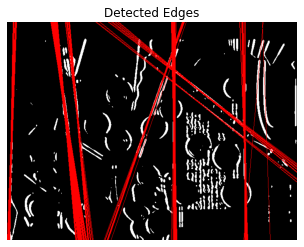

In [28]:
# Plot the Lines extracted on the Original Image
# Play with the Accumulator Thresholding to get rid of the unwanted lines

plot_lines('../results/Ques_3/Clutter_Smooth_Binary_Image.png', clutter_smooth_accumulator, clutter_smooth_thetas, clutter_smooth_rhos, 190, save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Lines.png')

#### 3.5 Most likely the last exercise produced several lines which DO NOT repesent the boundaries of the pens. How do you take care of the probem? Discuss.

<b>Here I used two approaches. I adjusted the parameters of the threshold to a minimum threshold and a maximum threshold. By adjusting these two threshold parameters, I can control the lines within an interval. In addition to this, I also control the length of the lines so that once they exceed the length I have specified, then only the lines within the range are kept.
    <b>

#### 3.6 Find the edges which represents only the boundaries of the pens and plot it on the smooth version of the clutter image. 
You need to write a function similar to plot_edges() (but NOT the same).  You will need to check the length of each segment of the line and select only the ones that are above a certain threshold length.  

Save the output image as <b>'../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'</b>

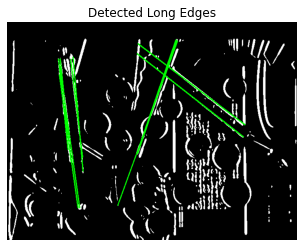

In [29]:
##############################
# TO DO: Your Implementation
##############################
def plot_long_edges(img_path, accumulator, thetas, rhos, min_acc_threshold, max_acc_threshold, binary_image, min_line_length, save_path):
    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    height, width = img.shape[:2]
    
    for rho_idx in range(len(rhos)):
        for theta_idx in range(len(thetas)):
            acc_value = accumulator[rho_idx, theta_idx]
            if min_acc_threshold <= acc_value <= max_acc_threshold:
                rho = rhos[rho_idx]
                theta = thetas[theta_idx]
                
                if np.abs(np.sin(theta)) > 1e-6: 
                    x1 = 0
                    y1 = int((rho - x1 * np.cos(theta)) / np.sin(theta))
                    x2 = width
                    y2 = int((rho - x2 * np.cos(theta)) / np.sin(theta))
                else:
                    y1 = 0
                    x1 = int(rho / np.cos(theta))
                    y2 = height
                    x2 = int(rho / np.cos(theta))
                
                # Define the line as a function
                def line(x):
                    if np.abs(np.sin(theta)) > 1e-6:
                        return int((rho - x * np.cos(theta)) / np.sin(theta))
                    else:
                        return y1  # or y2, since for vertical line they should be the same
                
                # Find the start and end points of the line segment on the pencil boundary
                start_point = None
                end_point = None
                for x in range(width):
                    y = line(x)
                    if 0 <= y < height:
                        if binary_image[y, x] == 255:  # assuming the pencil boundary is white in the binary image
                            if start_point is None:
                                start_point = (x, y)
                            end_point = (x, y)
                
                # Draw the finite line segment on the image if it's long enough
                if start_point is not None and end_point is not None:
                    line_length = np.sqrt((end_point[0] - start_point[0])**2 + (end_point[1] - start_point[1])**2)
                    if line_length > min_line_length:
                        cv.line(img, start_point, end_point, (0, 255, 0), 2)
        
    plt.imsave(save_path, img)
    
    plt.imshow(img)
    plt.title('Detected Long Edges')
    plt.axis('off')
    plt.show()
################################
# Your Implementation ENDS here
################################

plot_long_edges(
    img_path='../results/Ques_3/Clutter_Smooth_Binary_Image.png', 
    accumulator=clutter_smooth_accumulator, 
    thetas=clutter_smooth_thetas, 
    rhos=clutter_smooth_rhos, 
    min_acc_threshold=220, 
    max_acc_threshold=226,
    binary_image=clutter_smooth_binary_img, 
    min_line_length=100, 
    save_path='../results/Ques_3/Clutter_Smooth_Image_Output_Edges.png'
)

### 4. Hough Transform to detect Circles from Cluttered Image (17 points)
In this exercise you are expected to implement Hough Transform for detecting circles from cluttered image. Hough Transform is applied on binary images which can be generated by thresholding the edge detector output.

#### Tasks:
1. Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array. <b>(2 points)</b>
2. Identify the edges in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>. <b>(2 points)</b>
3. Identify the circles in the Image using Hough Transform. <b>(2 points)</b>
4. Draw the detected circles. <b>(2 points)</b>
5. Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this? <b>(5 points)</b>
6. You are required to find boundaries around atleast 8 coins in the image. <b>(4 points)</b>

#### 4.1 Smooth the given image using the Gaussian Filter. Determine the Gaussian filter and comment on its effect in determining the circles. Save the smooth image as <b>clutter_smooth_img_circle_detection</b>, numpy array.

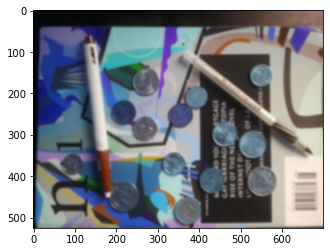

In [30]:
# Reading the Input Image
clutter_img_circle_detection        = cv.imread('../data/proj2-clutter-image.jpg')

##############################
# TO DO: Your Implementation
##############################

# Generates the Gaussian Filter
g_kernel   = Gaussian_Filter(2)

# Smoothing the image with the Gaussian Filter
clutter_smooth_img_circle_detection = cv.filter2D(clutter_img_circle_detection, -1, g_kernel)

################################
# Your Implementation ENDS here
################################

# Saves the Smooth Image in the result directory
cv.imwrite("../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png", clutter_smooth_img_circle_detection)

# Plots the smoothed image in the notebook
plt.figure(); plt.imshow(clutter_smooth_img_circle_detection.astype(np.uint8));

#### 4.2 Identify the circles in the smooth image, generated in the previous step. You can use the solution of <b>Ques 1.2</b>. 
Save the numpy array as <b>clutter_smooth_img_gray_edge_circle_detection</b>.

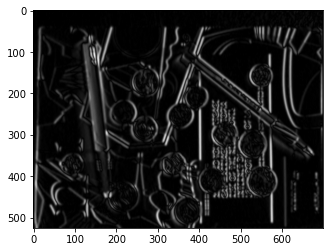

In [31]:
##############################
# TO DO: Your Implementation
##############################

clutter_smooth_img_gray_edge_circle_detection = sobel_filter(clutter_smooth_img_circle_detection)

################################
# Your Implementation ENDS here
################################

# Save the Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Edge_Image_Circle_Detection.png', clutter_smooth_img_gray_edge_circle_detection)

#Plot the Image
plt.figure(); plt.imshow(clutter_smooth_img_gray_edge.astype(np.uint8), cmap='gray');

#### 4.3 Identify the circles in the Image using Hough Transform

In [32]:
# Invoke the Hough Transform Method to Extract the Circles from the Image
# You need to find a resaonable estimate of the threshold for generating a binary image
# which is good enough for the Hough transform to extract circles
# To expedite the process you can play with the resolution parameters 
# without compromising the quality of the results

clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, clutter_smooth_circle_img_bin = circle_hough_transform(clutter_smooth_img_gray_edge_circle_detection, threshold=70, min_radius=25, max_radius=40, radius_res=1, angle_res=0.65)

# Save the Thresholded Binary Image
cv.imwrite('../results/Ques_4/Smooth_Clutter_Binary_Image_Circle_Detection.png', clutter_smooth_circle_img_bin)

True

#### 4.4 Draw the detected circles

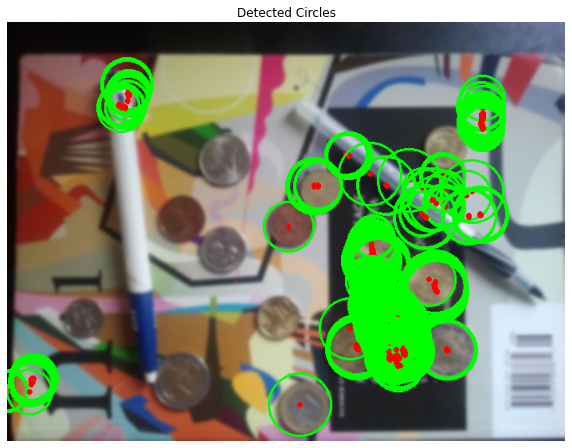

In [33]:
# Plot the Circles extracted on the Smooth Image

plot_circles('../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png', clutter_smooth_circle_accumulator, clutter_smooth_circle_radius_vector, clutter_smooth_circle_center_x_vector, clutter_smooth_circle_center_y_vector, 1, clutter_smooth_circle_img_bin, '../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png')

#### 4.5 Did the last solution detect any unwanted circles? If yes, please explain the reason. Which parameters you feel are affecting the result. Moreover, what could be the correct measures to prevent this?

<b>Yes, it did have some unwanted circles. These can be caused by a variety of factors, including noise in the background, clutter, or other circular patterns. If the radius range is too wide, it may detect circles of sizes that are not relevant to the task. On the other hand, if it is too narrow, it may miss actual circles. In addition to this, the resolution of the radius and angle accumulators affects the accuracy of circle detection. A low resolution may result in missing circles or inaccurate circle parameters, while a high resolution requires more computational resources. In this version, we use size filtering and threshold filtering. The circles that remain after filtering are drawn directly onto the image. Here I setted two parameters: min_radius and max_radius. Thus we can filter some circles. In a circle detection scenario, by comparing the distance and radius between the centers of the circles, we are able to determine which circles are overlapping and retain the detection results that are most likely to represent real round objects, thus improving the accuracy and readability of the detection. But I tried and did not succeed in applying it.
    <b>

#### 4.6 Devise some mechanisms such that you can find boundaries of at least 8 coins in the image

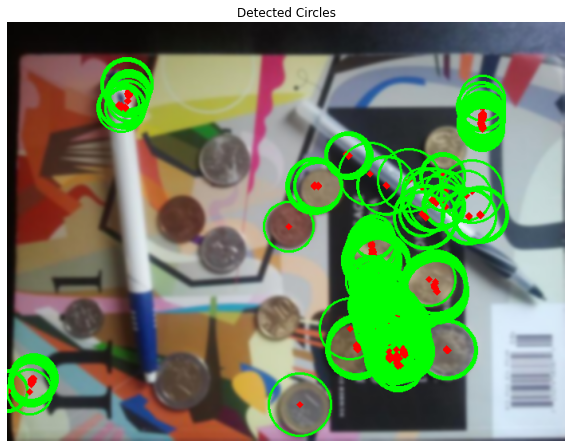

In [34]:
##############################
# TO DO: Your Implementation
##############################
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

def plot_circles(img_path, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image, img_save_path, min_radius, max_radius):

    cv_img = cv.imread(img_path)
    
    size_filtered_indices = np.where((radius_vector >= min_radius) & (radius_vector <= max_radius))[0]
    radius_vector = radius_vector[size_filtered_indices]
    center_x_vector = center_x_vector[size_filtered_indices]
    center_y_vector = center_y_vector[size_filtered_indices]

    acc_filtered_indices = np.where(accumulator[center_y_vector.astype(int), center_x_vector.astype(int), radius_vector.astype(int) - min_radius] > acc_threshold)[0]
    radius_vector = radius_vector[acc_filtered_indices]
    center_x_vector = center_x_vector[acc_filtered_indices]
    center_y_vector = center_y_vector[acc_filtered_indices]

    for center_x, center_y, radius in zip(center_x_vector, center_y_vector, radius_vector):
        center = (int(center_x), int(center_y))
        cv.circle(cv_img, center, int(radius), (0, 255, 0), 2) 
        cv.circle(cv_img, center, 2, (0, 0, 255), 3) 

    plt.figure(figsize=(10, 10))
    plt.imshow(cv.cvtColor(cv_img, cv.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis('off')
    plt.show()
    

    cv.imwrite(img_save_path, cv_img)

plot_circles(
    img_path='../results/Ques_4/proj2-clutter-image-smoothed_circle_detection.png',
    accumulator=clutter_smooth_circle_accumulator,
    radius_vector=clutter_smooth_circle_radius_vector,
    center_x_vector=clutter_smooth_circle_center_x_vector,
    center_y_vector=clutter_smooth_circle_center_y_vector,
    acc_threshold=5,  
    bin_image=clutter_smooth_circle_img_bin,
    img_save_path='../results/Ques_4/Smooth_Clutter_Image_Output_Circles.png',
    min_radius=25,
    max_radius=40
)


################################
# Your Implementation ENDS here
################################

### 5 Test Robustness to Noise (15 points)
In this exercise, we test the robustness of Hough Transform to Gaussian noise.<br>
For this experiment, consider the optimum setting of the parameters (like sigma for smoothing, threshold for binary image, threshold for accumulator and others) for both line and circle detection using Hough Transform.<br>

Then keep adding Gaussian noise to the clutter image, <b>proj2-clutter-image.jpg</b>, starting with sigma value of 5.0 and doubling the sigma at every step, until the detection of lines and circles substantially fails. Mark this value as the of sigma as the failure sigma value.<br>

Between the starting sigma value i.e., 5.0 and the failure sigma value, show sequence of 5 images (equally spaced as per the number of steps) with the detected lines and circles drawn on them where each image represents different sigma value for the Gaussian noise.<br>

With failure sigma value as noise parameter, generate the noisy image and determine a smoothing filter (Gaussian filter as used earlier) to detect lines and circles from the noisy image. Do not change any other parameters used for extraction of lines and circles.

#### Task
1. Starting with sigma value of 5.0 and doubling the sigma at every step determine the sigma when the line and circle detection using Hough Transform fails. <b>(7 points)</b> From the observation, the sigma=1280 will fail the plot.
2. Plot sequence of 5 images (equally spaced as per the number of steps) with the detected lines or circles drawn on them where each image represents different sigma value for the Gaussian noise. Save the output images separately for circles and lines with the corresponding sigma values. <b>(5 points)</b>
3. Generate a smoothing filter that can handle the maximum noise and help in the detection of lines and circles from the noisy image. Keep the other parameters similar. Save the output images for circles and lines separately. <b>(3 points)</b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_5/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.  Make sure to save the noisy and filtered images you are generating.  

In [35]:
import os

In [36]:
def add_gaussian_noise(image, sigma=25):

    row, col, ch = image.shape
    gauss = np.random.normal(0, sigma, (row, col, ch))
    noisy = np.clip(image + gauss, 0, 255)
    
    return noisy.astype(np.uint8)

In [58]:
def plot_noise_lines(img_path, img_rgb, accumulator, thetas, rhos, acc_threshold):
    
    img = cv.imread(img_path)
    
    height, width = img_rgb.shape[0], img_rgb.shape[1]
    
    for y in range(accumulator.shape[0]):
        for x in range(accumulator.shape[1]):
            if accumulator[y,x] > acc_threshold:
                rho = rhos[y]
                theta = thetas[x]
                
                if np.abs(np.sin(theta)) > 1e-6: 
                    x1 = 0
                    y1 = int((rho - x1 * np.cos(theta)) / np.sin(theta))
                    x2 = width
                    y2 = int((rho - x2 * np.cos(theta)) / np.sin(theta))
                else:
                    y1 = 0
                    x1 = int(rho / np.cos(theta))
                    y2 = height
                    x2 = int(rho / np.cos(theta))
    
                cv.line(img_rgb, (x1,y1), (x2,y2), (255, 0, 0))
        
    plt.imshow(img_rgb)
    plt.title('Detected Edges')
    plt.axis('off')
    plt.show()
    
    return img_rgb

In [57]:
def plot_noise_circles(cv_img, accumulator, radius_vector, center_x_vector, center_y_vector, acc_threshold, bin_image):
    
    for center_x, center_y, radius in zip(center_x_vector, center_y_vector, radius_vector):
        # if accumulator[center_y, center_x, radius - min(radius_vector)] > acc_threshold:
        center = (center_x, center_y)
        cv.circle(cv_img, center, radius, (0, 255, 0), 2)  # Draw the circle in green with a thickness of 2 pixels
        cv.circle(cv_img, center, 2, (0, 0, 255), 2)       # Draw the circle center in red with a thickness of 2 pixels

    # Plotting using matplotlib.pyplot
    plt.figure(figsize=(10, 10))
    
    # Convert BGR to RGB for plotting
    plt.imshow(cv.cvtColor(cv_img, cv.COLOR_BGR2RGB))
    plt.title("Detected Circles")
    plt.axis('off')
    plt.show()
    
    return cv_img

In [41]:
clutter_img = cv.imread('../data/proj2-clutter-image.jpg')
sigma = 5.0
step = 0
max_steps = 6
save_images = 0
while step < max_steps:

    noisy_img = add_gaussian_noise(clutter_img, sigma)

    g_kernel = Gaussian_Filter(2)
    noisy_smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

    noisy_smooth_img_gray_edge = sobel_filter(noisy_smooth_img)

    accumulator, thetas, rhos, binary_img = hough_transform(noisy_smooth_img_gray_edge, threshold=75, theta_res=1, rho_res=1)
    
    img_with_lines = plot_noise_lines('../data/proj2-clutter-image.jpg', noisy_img, accumulator, thetas, rhos, 190)  
    
    cv.imwrite(os.path.join('../results/Ques_5/', f'noisy_img_lines_sigma_{sigma}.png'), img_with_lines)
    
    sigma *= 2
    step += 1
   
print(f'Failure will occur after {step} steps')

Failure will occur after 6 steps


In [42]:
sigma = 5.0
step = 0
max_steps = 6
save_images = 0
while step < max_steps:

    noisy_img = add_gaussian_noise(clutter_img, sigma)

    g_kernel = Gaussian_Filter(2)
    noisy_smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

    noisy_smooth_img_gray_edge = sobel_filter(noisy_smooth_img)

    accumulator, radius, center_x, center_y, img_bin = circle_hough_transform(noisy_smooth_img_gray_edge, threshold=100, min_radius=18, max_radius=40, radius_res=1, angle_res=0.25)
    
    img_with_circles = plot_noise_circles(noisy_img, accumulator, radius, center_x, center_y, 1, img_bin)  
    
    cv.imwrite(os.path.join('../results/Ques_5/', f'noisy_img_circles_sigma_{sigma}.png'), img_with_circles)
        
    sigma *= 2
    step += 1

print(f'Failure will occur after {step} steps')

Failure will occur after 6 steps


<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

<Figure size 720x720 with 0 Axes>

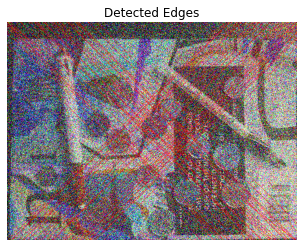

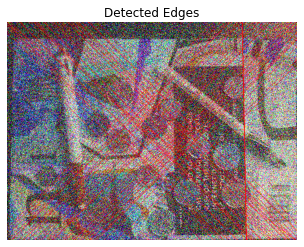

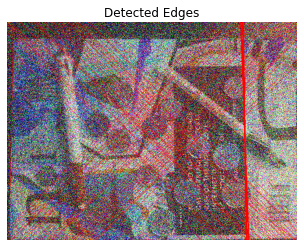

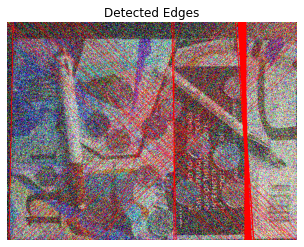

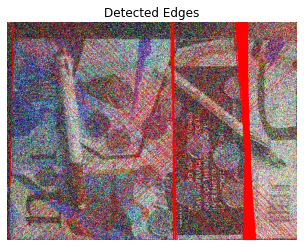

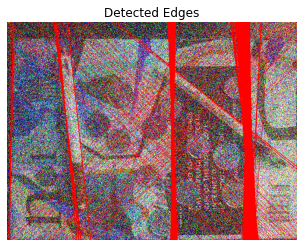

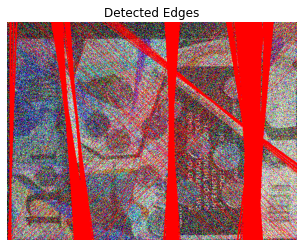

Successful sigma: 4.0


In [66]:
# Task 3
original_img = cv.imread('../data/proj2-clutter-image.jpg')

start_sigma = 0.5
failure_sigma = 160
increment_sigma = 0.5

noisy_img = add_gaussian_noise(original_img, failure_sigma)

sigma = start_sigma

while True:

    g_kernel = Gaussian_Filter(sigma)
    
    smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

    edges = sobel_filter(smooth_img)

    accumulator, thetas, rhos, binary_img = hough_transform(edges, threshold=75, theta_res=1, rho_res=1)
    lines_detected = plot_noise_lines('../data/proj2-clutter-image.jpg', noisy_img, accumulator, thetas, rhos, 190)

    cv.imwrite(os.path.join('../results/Ques_5/', f'failure_line.png'), lines_detected)
    
    sigma += increment_sigma
    
    if sigma == 4:
        break

print(f'Successful sigma: {sigma}')

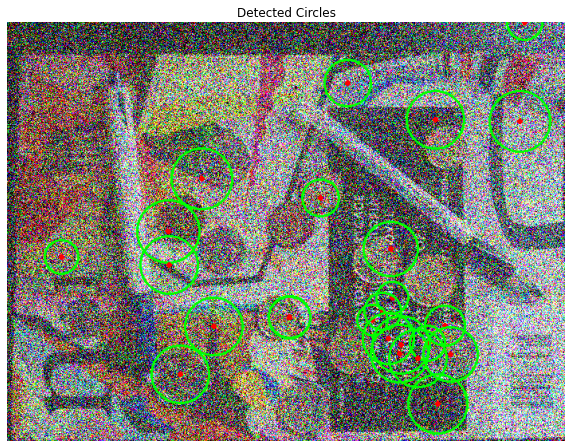

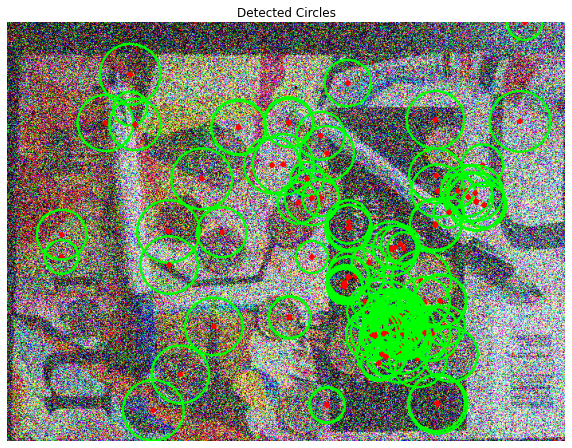

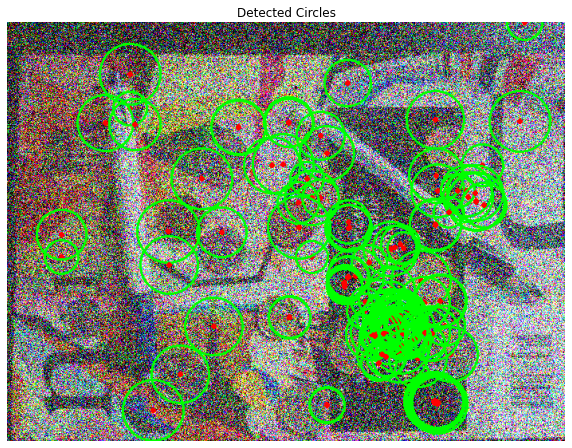

Successful sigma: 2.0


In [67]:
# Task 3
original_img = cv.imread('../data/proj2-clutter-image.jpg')

start_sigma = 0.5
failure_sigma = 160
increment_sigma = 0.5

noisy_img = add_gaussian_noise(original_img, failure_sigma)

sigma = start_sigma

while True:

    g_kernel = Gaussian_Filter(sigma)
    
    smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

    edges = sobel_filter(smooth_img)

    accumulator, radius, center_x, center_y, img_bin = circle_hough_transform(edges, threshold=100, 
                                                                              min_radius=18, max_radius=40, 
                                                                              radius_res=1, angle_res=0.25)
    circles_detected = plot_noise_circles(noisy_img, accumulator, radius, center_x, center_y, 1, img_bin)  

    cv.imwrite(os.path.join('../results/Ques_5/', f'failure_circle.png'), circles_detected)
    
    sigma += increment_sigma
    
    if sigma == 2:
        break

print(f'Successful sigma: {sigma}')

### 6 Hough Transform to detect Lines and Circles from a Distorted Image (15 points)
In this exercise you should use your Hough Transform implementation to try and detect lines and circles from the distorted image, <b>proj2-foreshortened-image.jpg</b>. Load the image from the data directory to do all the procesing to extract the lines and circles.


#### Tasks:
1. Plot the edges of the pens and boundaries of the coins, using the functions defined in the previous questions <b>(5 points)</b>
3. How many of the lines and edges in the image did your Hough transform detect? How many additional lines and circles do you see that weren't detected? What differences in appearance, shape, etc. do you notice between those that were and weren't detected? <b>(5 points)</b>

<b>Answer: The Line Hough Transform algorithm detects at least 9 lines or edges in the image. The Circle Hough Transform algorithm detects at least 13 circles in the image. there are only two undetected edges, and about 6 undetected circles. The undetected lines are again not very distinct edges, while the undetected circles are more elliptical than circular. In general, undetected lines and circles include lines and circles with weak or thin edges. Partially blurred or incomplete shapes. Shapes that are not obvious in the background noise.<b>

4. Discuss what changes to the alogirhtm you think could help in making the missed lines and circles visible? <b>(5 points)</b>

<b>Answer: 
    1. Lowering the threshold for edge detection can help detect shapes with weaker edges.
    2. Trying to use different edge detection algorithms or parameters may give better results in some cases.
    3. Enhance lines and circles in an image by filtering, contrast enhancement, or other image processing techniques to make them easier to detect before applying the Hough transform.
    4. optimize non-maximum suppression algorithms to more accurately filter and retain true lines and circles.<b>

#### Results:
All the output images should be saved in the directory <b>results/Ques_6/</b> with a meaningful name (as used in previous questions). Use the <b>imwrite</b> function in OpenCV library for saving images. You should use the OpenCV <b>line</b> and <b>circle</b> function to draw lines and circles respectively.

In [52]:
def plot_noise_edges(img_path, accumulator, thetas, rhos, acc_threshold, binary_image):

    img = cv.imread(img_path)
    img = cv.cvtColor(img, cv.COLOR_BGR2RGB)
    
    height, width = img.shape[0], img.shape[1]
    
    acc_thresholded = np.where(accumulator > acc_threshold)
    
    for rho_idx, theta_idx in zip(*acc_thresholded):
        rho = rhos[rho_idx]
        theta = thetas[theta_idx]
        
        if np.abs(np.sin(theta)) > 1e-6: 
            x1 = 0
            y1 = int((rho - x1 * np.cos(theta)) / np.sin(theta))
            x2 = width
            y2 = int((rho - x2 * np.cos(theta)) / np.sin(theta))
        else:
            y1 = 0
            x1 = int(rho / np.cos(theta))
            y2 = height
            x2 = int(rho / np.cos(theta))
            
        # Define the line as a function
        def line(x):
            if np.abs(np.sin(theta)) > 1e-6:
                return int((rho - x * np.cos(theta)) / np.sin(theta))
            else:
                return y1  # or y2, since for vertical line they should be the same

        # Find the start and end points of the line segment on the pencil boundary
        start_point = None
        end_point = None
        for x in range(width):
            y = line(x)
            if 0 <= y < height:
                if binary_image[y, x] == 255:  # assuming the pencil boundary is white in the binary image
                    if start_point is None:
                        start_point = (x, y)
                    end_point = (x, y)
        
        # Draw the finite line segment on the image
        if start_point is not None and end_point is not None:
            cv.line(img, start_point, end_point, (0, 255, 0), 2)
            
    plt.imshow(img)
    plt.title('Detected Edges')
    plt.axis('off')
    plt.show()
    
    return img

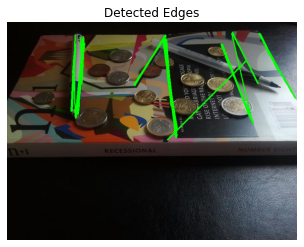

True

In [59]:
foreshortened_img = cv.imread('../data/proj2-foreshortened-image.jpg')
sigma = 5.0

noisy_img = add_gaussian_noise(foreshortened_img, sigma)

g_kernel = Gaussian_Filter(2)
noisy_smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

noisy_smooth_img_gray_edge = sobel_filter(noisy_smooth_img)

accumulator, thetas, rhos, binary_img = hough_transform(noisy_smooth_img_gray_edge, threshold=75, theta_res=1, rho_res=1)

img_with_lines = plot_noise_edges('../data/proj2-foreshortened-image.jpg', accumulator, thetas, rhos, 70, binary_img)  

cv.imwrite(os.path.join('../results/Ques_6/', f'foreshortened_image_lines.png'), img_with_lines)

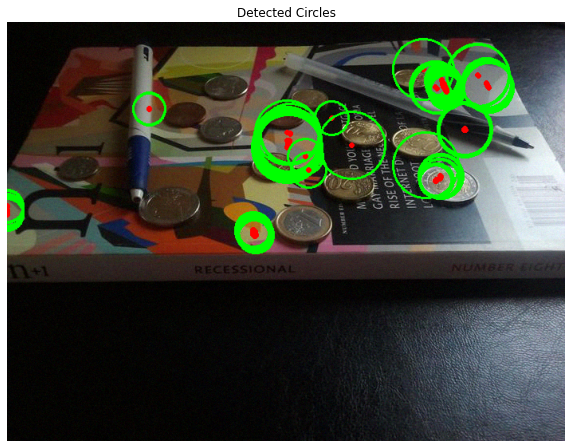

True

In [65]:
foreshortened_img = cv.imread('../data/proj2-foreshortened-image.jpg')
sigma = 5.0

noisy_img = add_gaussian_noise(foreshortened_img, sigma)

g_kernel = Gaussian_Filter(2)
noisy_smooth_img = cv.filter2D(noisy_img, -1, g_kernel)

noisy_smooth_img_gray_edge = sobel_filter(noisy_smooth_img)

accumulator, radius, center_x, center_y, img_bin = circle_hough_transform(noisy_smooth_img_gray_edge, 
                                                                          threshold=80, min_radius=20, 
                                                                          max_radius=45, radius_res=1, 
                                                                          angle_res=0.25)

circles_detected = plot_noise_circles(noisy_img, accumulator, radius, center_x, center_y, 1, img_bin)  

cv.imwrite(os.path.join('../results/Ques_6/', f'foreshortened_image_circles.png'), circles_detected)